# Implementações dos problemas de PLI - A2
### Disciplina: Programação Linear Inteira
### Integrantes: Daniel Jacob, Juliana Carrica, Wendell Oliveira
### Professor: Vincent Gerard Y. Guigues

In [2]:
import Pkg; Pkg.add("MathOptInterface")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("DataFrames")
import Pkg; Pkg.add("GLPK")
import Pkg; Pkg.add("JuMP")

    Updating registry at `C:\Users\wende\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\wende\.julia\environments\v1.10\Manifest.toml`


In [3]:
#Bibliotecas 
using JuMP
using GLPK
using Plots
using DataFrames

# Problema 1.1

In [4]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:2, 1:3] >= 0, Int)

# Função objetivo
c = [1 2 1.5; 2 3.5 2]  # Custos de transporte organizados por usina
@objective(model, Min, sum(x[i, j] * c[i, j] for i in 1:2, j in 1:3))

# Restrições de capacidade das usinas
@constraint(model, sum(x[1, j] for j in 1:3) <= 400)
@constraint(model, sum(x[2, j] for j in 1:3) <= 300)

# Restrições de demanda das fábricas
@constraint(model, sum(x[i,1] for i in 1:2) == 100)
@constraint(model, sum(x[i,2] for i in 1:2) == 200)
@constraint(model, sum(x[i,3] for i in 1:2) == 300)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo mínimo: ", objective_value(model))
println("Quantidades ótimas de transporte:")
for i in 1:2
    for j in 1:3
        println("x[$i, $j] = ", value(x[i, j]))
    end
end

# Imprimindo excedente no estoque
println("Excedente na usina 1: ", 400 -  value(sum(x[1, j] for j in 1:3)) )
println("Excedente na usina 2: ", 300 -  value(sum(x[2, j] for j in 1:3)) )

Custo mínimo: 1050.0
Quantidades ótimas de transporte:
x[1, 1] = 100.0
x[1, 2] = 200.0
x[1, 3] = 100.0
x[2, 1] = 0.0
x[2, 2] = 0.0
x[2, 3] = 200.0
Excedente na usina 1: 0.0
Excedente na usina 2: 100.0


# Problema 1.2

In [5]:
# Definindo o modelo
model_first = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model_first, p[1:2] >= 0, Int)

# Função objetivo
c = [7 9]  # Lucro por kilo de produto
@objective(model_first, Max, sum(p[j] * c[j] for j in 1:2))

# Restrições de limitação de matéria-prima
@constraint(model_first, p[1] + p[2] <= 8)
@constraint(model_first, 2p[1] + 3p[2] <= 19)
@constraint(model_first, p[2] <= 4)

# Resolvendo o modelo]
optimize!(model_first)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model_first))
println("Quantidades ótimas de produção:")
for i in 1:2
    println("T[$i] = ", value(p[i]))
end

#Exibindo o excedente de matéria-prima
println("Excedente Nitrato: ", 8 - ( value(p[1]) + value(p[2]) ))
println("Excedente Sal de Potássio: ", 19 - ( 2value(p[1]) + 3value(p[2])))
println("Excedente Fosfato: ", 4 -  (value(p[2]) ))




Lucro máximo: 62.0
Quantidades ótimas de produção:
T[1] = 5.0
T[2] = 3.0
Excedente Nitrato: 0.0
Excedente Sal de Potássio: 0.0
Excedente Fosfato: 1.0


In [6]:
# Definindo o modelo
model_sec = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model_sec, P[1:3] >= 0, Int)

# Função objetivo
c = [8, 19, 4]  # Quantidade de nutrientes por quilo de produto disponível
@objective(model_sec, Min, sum(P[i] * c[i] for i in 1:3))

# Restrições de lucro por quilo de produto
@constraint(model_sec, P[1] + 2* P[2] >= 700)
@constraint(model_sec, P[1] +3P[2] + P[3] >= 900)

# Resolvendo o modelo
optimize!(model_sec)

# Imprimindo o resultado
println("Minimização do preço à granel: ", objective_value(model_sec))
println("Preço por granel:")
for i in 1:3
    println("P[$i] = ", value(P[i]))
end


Minimização do preço à granel: 6200.0
Preço por granel:
P[1] = 300.0
P[2] = 200.0
P[3] = 0.0


# Problema 1.3

In [7]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:2 , 1:3] >= 0, Int)

# Função objetivo
c = [38 27 48 ; 37 58 45]  # Custo de transporte por rota
@objective(model, Max, sum(q[i,j] * c[i,j] for i in 1:2, j in 1:3))

# Restrições de limitação de matéria-prima
@constraint(model, sum(q[1,j] for j in 1:3) <= 6)
@constraint(model, sum(q[2,j] for j in 1:3) <= 6)

# Restrições de demanda das fábricas
@constraint(model, sum(q[i,1] for i in 1:2) == 5)
@constraint(model, sum(q[i,2] for i in 1:2) == 4)
@constraint(model, sum(q[i,3] for i in 1:2) == 3)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo mínimo de distribuição: ", objective_value(model))
println("Quantidades ótimas de distribuição:")
for i in 1:2
    for j in 1:3
        println("q[$i, $j] = ", value(q[i, j]))
    end
end

#Exibindo as sobras de cada usina
println("Sobra na usina 1: ", 6 -  value(sum(q[1, j] for j in 1:3)) )
println("Sobra na usina 2: ", 6 -  value(sum(q[2, j] for j in 1:3)) )



Custo mínimo de distribuição: 564.0
Quantidades ótimas de distribuição:
q[1, 1] = 3.0
q[1, 2] = 0.0
q[1, 3] = 3.0
q[2, 1] = 2.0
q[2, 2] = 4.0
q[2, 3] = 0.0
Sobra na usina 1: 0.0
Sobra na usina 2: 0.0


# Problema 1.4

In [8]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, S >= 0, Int)
@variable(model, C >= 0, Int)

# Função objetivo
@objective(model, Max, 5S + 4C)

# Restrições de limitação de matéria-prima
@constraint(model, 2S+C <= 78)

# Restrições de horas trabalhadas
@constraint(model, 10S+12C == 600)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))
println("Quantidades ótimas de produção:")
println("S = ", value(S))
println("C = ", value(C))
#Horas trabalhadas 
println("Horas trabalhadas em sapatos: ", 10*value(S) )
println("Horas trabalhadas em cintos: ", 12*value(C) )


Lucro máximo: 240.0
Quantidades ótimas de produção:
S = 24.0
C = 30.0
Horas trabalhadas em sapatos: 240.0
Horas trabalhadas em cintos: 360.0


# Problema 1.5

In [9]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, QA >= 0, Int)
@variable(model, QB >= 0, Int)

# Função objetivo
@objective(model, Max, 20QA + 30QB)

# Restrições de limitação de matéria-prima
@constraint(model, (1/4)*QA <= 500)
@constraint(model, (1/4)*QA + (1/2)*QB<= 200)
@constraint(model, (1/2)*QA + (1/2)*QB<= 200)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))
println("Quantidades ótimas de produção:")
println("QA = ", value(QA))
println("QB = ", value(QB))

#Exibindo o excedente de matéria-prima
println("Excedente de A: ", 500 -  (1/4)*value(QA) )
println("Excedente de B: ", 200 -  (1/4)*value(QA) - (1/2)*value(QB) )
println("Excedente de C: ", 200 -  (1/2)*value(QA) - (1/2)*value(QB) )

Lucro máximo: 12000.0
Quantidades ótimas de produção:
QA = 0.0
QB = 400.0
Excedente de A: 500.0
Excedente de B: 0.0
Excedente de C: 0.0


# Problema 1.6 - a implementação diz que não tem resultado ótimo


In [10]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:4, 1:3], Int)

# Função objetivo
# c = [5.5, 4.5, 3.5]  # Venda dos diesel 1,2,3
c = [5.5, 4.5, 3.5]  # Teste
d = [3, 6, 4, 1] # Custo dos petróleos 1,2,3,4
# d = [3,1,1,1] #Teste

@objective(model, Max, sum(c[j]*sum(q[i,j] for i in 1:4) for j in 1:3) - sum(d[i]*sum(q[i,j] for j in 1:3) for i in 1:4))   


# @objective(model, Max, (sum(q[i,j] * c[j]) - sum(q[i,j] * d[i]))  for i in 1:4, j in 1:3)
                    # -sum((q[i,j] * d[i]) for i in 1:4, j in 1:3))

# @objective(model, Min, sum((q[i,j] * d[i]) for i in 1:4, j in 1:3))

# Restrições de composição
# Diesel A
@constraint(model, (0.3) * sum(q[i,1] for i in 1:4) >= q[1,1])
@constraint(model, (0.4) * sum(q[i,1] for i in 1:4) <= q[2,1])
@constraint(model, (0.5) * sum(q[i,1] for i in 1:4) >= q[3,1])
# Diesel B
@constraint(model, (0.5) * sum(q[i,2] for i in 1:4) >= q[1,2])
@constraint(model, (0.1) * sum(q[i,2] for i in 1:4) <= q[2,2])
# Diesel C
@constraint(model, (0.7) * sum(q[i,3] for i in 1:4) >= q[1,3])

# Restrições de matéria-prima
@constraint(model, sum(q[1,j] for j in 1:3) <= 3000)
@constraint(model, sum(q[2,j] for j in 1:3) <= 2000)
@constraint(model, sum(q[3,j] for j in 1:3) <= 4000)
@constraint(model, sum(q[4,j] for j in 1:3) <= 1000)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))

# # Quantidades ótimas de produção de cada diesel
# for j in 1:3
#     println("Quantidade ótima de diesel tipo $j: ", sum(value(q[i,j]) for i in 1:4))
# end

# # Excedentes de matéria-prima
# println("Excedente de matéria-prima:")
# println("Excedente de 1: ", 3000 - sum(value(q[1,j]) for j in 1:3))
# println("Excedente de 2: ", 2000 - sum(value(q[2,j]) for j in 1:3))
# println("Excedente de 3: ", 4000 - sum(value(q[3,j]) for j in 1:3))
# println("Excedente de 4: ", 1000 - sum(value(q[4,j]) for j in 1:3))


MathOptInterface.ResultIndexBoundsError{MathOptInterface.ObjectiveValue}: Result index of attribute MathOptInterface.ObjectiveValue(1) out of bounds. There are currently 0 solution(s) in the model.

# Problema 2.1 - Gestão da produção de eletricidade

In [16]:
#Quantidade de regiôes e fontes de energia
qtdd_hidreletricas = 4
qtdd_termicas = [3,4,2,3]

#quantidade de dias a ser feita previsão
T = 7

######################################################################################################################
#quantidade de energia máxima que cada fonte pode gerar
V = [150, 200, 250, 300]
U = [50 100 150 200 ; 50 100 150 200 ; 50 100 150 200 ; 50 100 150 200]


#Custo de produção de cada usina térmica 
c = [5 10 15 0 ; 0.5 5 1 1.5 ; 10 10 0 0 ; 5 2.5 1 0]

#Preço da energia comprada no spot
spot = [150, 200, 250, 255, 300, 350, 400, 450, 500, 550, 600, 605, 700, 705, 800]

#Quantidade máxima de transferência de energia entre regiões
E = [0 100 100 100 ; 100 0 100 100 ; 100 100 0 100 ; 100 100 100 0]

#Quantidades mínimas e máximas dos reservatórios
m = [5, 5, 5, 5]
M = [500, 500, 500, 500]

#demandas diárias por região
D = [200 250 300 350 400 450 500;
     250 300 350 400 450 500 550;
     150 200 250 300 350 400 450;
     100 150 200 250 300 350 400]

# afluências diárias em cada região
A = [20 25 30 35 40 45 50 ;
     150 200 250 300 350 400 450 ;
     150 200 250 300 350 400 450 ;
     1700 1500 2300 290 30 70 90 ]

#quantidade de água no reservatório no primeiro dia
N = [10, 10, 10, 10]
#################################################################################################################

# Definindo o modelo
model = Model(GLPK.Optimizer)

#Variáveis de decisão
#qtdd_energia_produzida_termicas
@variable(model, u[i = 1:qtdd_hidreletricas, j = 1:qtdd_termicas[i], 1:T] >= 0)

#qtdd_energia_produzida_hidreletricas
@variable(model, v[1:qtdd_hidreletricas,1:T] >= 0, Int)
 
#qtdd energia comprada spot
@variable(model, s[1:qtdd_hidreletricas,1:T] >= 0 , Int)

#qtdd_energia_trocada entre regiões
@variable(model, e[1:qtdd_hidreletricas,1:qtdd_hidreletricas,1:T] >= 0 , Int)

#quantidade de agua a deixar fluir
@variable(model, a[1:qtdd_hidreletricas,1:T] >= 0 , Int)

#quantidade de água deixada no reservatório pro dia seguinte
@variable(model, n[1:qtdd_hidreletricas,2:T] >= 0 , Int)

# Função objetivo
@objective(model, Min, sum(u[i,j,t] * c[i,j] for i in 1:qtdd_hidreletricas, j in 1:qtdd_termicas[i], t in 1:T)
                        + sum(s[i,t] * spot[t] for i in 1:qtdd_hidreletricas, t in 1:T))

# Restrições de produção de energia
#restrição de limitação das hidrelétricas
for i in 1:qtdd_hidreletricas
    for t in 1:T
        @constraint(model, v[i,t] <= V[i])
    end
end
#restrição de limitação das termicas
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_termicas[i]
        for t in 1:T
            @constraint(model, u[i,j,t] <= U[j,i])
        end
    end
end
#limitação de transferência entre regiões
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_hidreletricas
        if i != j
            for t in 1:T
                @constraint(model, e[i,j,t] <= E[i,j])
            end
        end
    end
end
#capacidades mínimas e máximas do reservatório
for i in 1:qtdd_hidreletricas
    for t in 2:T
     @constraint(model, m[i] <= n[i,t] <= M[i])
    end
end

#a quantidade de água restante pro dia seguinte
for i in 1:qtdd_hidreletricas
    @constraint(model, n[i,2] == N[i] +  0.8*A[i,2] - v[i,2] - a[i,2])
end
for i in 1:qtdd_hidreletricas
    for t in 3:T
        @constraint(model, n[i,t] == n[i,t-1] + 0.8*A[i,t] - v[i,t] - a[i,t])
    end
end

#demanda diária por região
for i in 1:qtdd_hidreletricas
    for t in 1:T
        #demanda = energia produzida + energia comprada + energia trocada
        @constraint(model, v[i,t]  + s[i,t] + sum(u[i,j,t] for j in 1:qtdd_termicas[i]) + 0.2A[i,t] +  sum(e[j,i,t] for j in 1:qtdd_hidreletricas) - sum(e[i,j,t] for j in 1:qtdd_hidreletricas)>= D[i,t])
    end
end

# Resolvendo o modelo
optimize!(model)

using Printf

# Imprimindo o resultado
println("Custo mínimo: ", objective_value(model))


Custo mínimo: 5567.0


In [17]:
#salvar em uma lista a evolução de produção diária de cada usina térmica
#definir matriz
results = Matrix{Any}(undef, sum(qtdd_termicas[i] for i in 1:qtdd_hidreletricas), T+1)
contador = 1
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_termicas[i]
        results[contador,1] = ["Reg.$i-Term.$j"]
        for t in 1:T
            results[contador,t+1]  = Int(value(u[i,j,t]))
        end
        contador += 1
    end
end
titles = ["Térmica|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Produção diária de cada usina térmica")
prod_termicas = DataFrame(results, titles)


Produção diária de cada usina térmica


Row,Térmica|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1-Term.1""]",0,0,0,43,50,50,50
2,"[""Reg.1-Term.2""]",0,0,0,0,0,38,50
3,"[""Reg.1-Term.3""]",0,0,0,0,0,0,0
4,"[""Reg.2-Term.1""]",0,39,100,100,100,100,100
5,"[""Reg.2-Term.2""]",0,0,0,0,0,0,60
6,"[""Reg.2-Term.3""]",0,0,0,100,100,100,100
7,"[""Reg.2-Term.4""]",0,0,0,0,100,100,100
8,"[""Reg.3-Term.1""]",0,0,0,0,0,0,10
9,"[""Reg.3-Term.2""]",0,0,0,0,0,0,0


In [18]:
#salvar em uma lista a evolução de produção diária de cada usina térmica
#definir matriz
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Hidro.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(v[i,t]))
        end
    end
titles = ["Hidrelétricas|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Produção diária de cada hidrelétrica")
prod_hidro = DataFrame(results, titles)

Produção diária de cada hidrelétrica


Row,Hidrelétricas|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Hidro.1""]",150,0,0,0,42,53,90
2,"[""Hidro.2""]",200,165,200,200,200,200,200
3,"[""Hidro.3""]",120,161,194,250,250,250,250
4,"[""Hidro.4""]",0,300,300,232,139,226,282


In [19]:
#Compra diária de energia no mercado spot
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Reg.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(s[i,t]))
        end
    end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Compra diária de energia no mercado spot")
compra_spot = DataFrame(results, titles)

Compra diária de energia no mercado spot


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1""]",0,0,0,0,0,0,0
2,"[""Reg.2""]",0,0,0,0,0,0,0
3,"[""Reg.3""]",0,0,0,0,0,0,0
4,"[""Reg.4""]",0,0,0,0,0,0,0


In [20]:
#Quantidade de afluência a ser liberada diariamente
#Compra diária de energia no mercado spot
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Reg.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(a[i,t]))
        end
    end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Vazão diaria de água")
compra_spot = DataFrame(results, titles)

Vazão diaria de água


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1""]",0,0,0,0,0,0,0
2,"[""Reg.2""]",0,0,0,40,80,120,160
3,"[""Reg.3""]",0,0,0,0,30,70,110
4,"[""Reg.4""]",0,905,1045,0,0,0,0


In [21]:
#Tranferência de energia diária entre Regiões
results = Matrix{Any}(undef, qtdd_hidreletricas*qtdd_hidreletricas, T+1)
contador = 1
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_hidreletricas
            results[contador,1] = ["Reg.$i-Reg.$j"]
            for t in 1:T
                results[contador,t+1]  = Int(value(e[i,j,t]))
            end
            contador += 1
    end
end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Transferência de energia diária entre regiões")
trans_diaria = DataFrame(results, titles)

Transferência de energia diária entre regiões


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1-Reg.1""]",0,0,0,0,0,0,0
2,"[""Reg.1-Reg.2""]",0,0,0,0,0,0,0
3,"[""Reg.1-Reg.3""]",0,0,0,0,0,0,0
4,"[""Reg.1-Reg.4""]",0,0,0,0,0,0,0
5,"[""Reg.2-Reg.1""]",0,45,100,100,100,100,100
6,"[""Reg.2-Reg.2""]",0,0,0,0,0,0,0
7,"[""Reg.2-Reg.3""]",0,0,0,0,100,70,100
8,"[""Reg.2-Reg.4""]",0,0,0,0,0,0,0
9,"[""Reg.3-Reg.1""]",0,100,94,100,100,100,100


Custo diário de produção por região
4×8 DataFrame
 Row │ Regiões|Tempo  1    2     3     4      5      6      7     
     │ Any            Any  Any   Any   Any    Any    Any    Any   
─────┼────────────────────────────────────────────────────────────
   1 │ Reg.1          0.0  0.0   0.0   215.0  250.0  630.0  750.0
   2 │ Reg.2          0.0  19.5  50.0  150.0  300.0  300.0  600.0
   3 │ Reg.3          0.0  0.0   0.0   0.0    0.0    0.0    100.0
   4 │ Reg.4          0.0  0.0   0.0   190.0  612.5  700.0  700.0


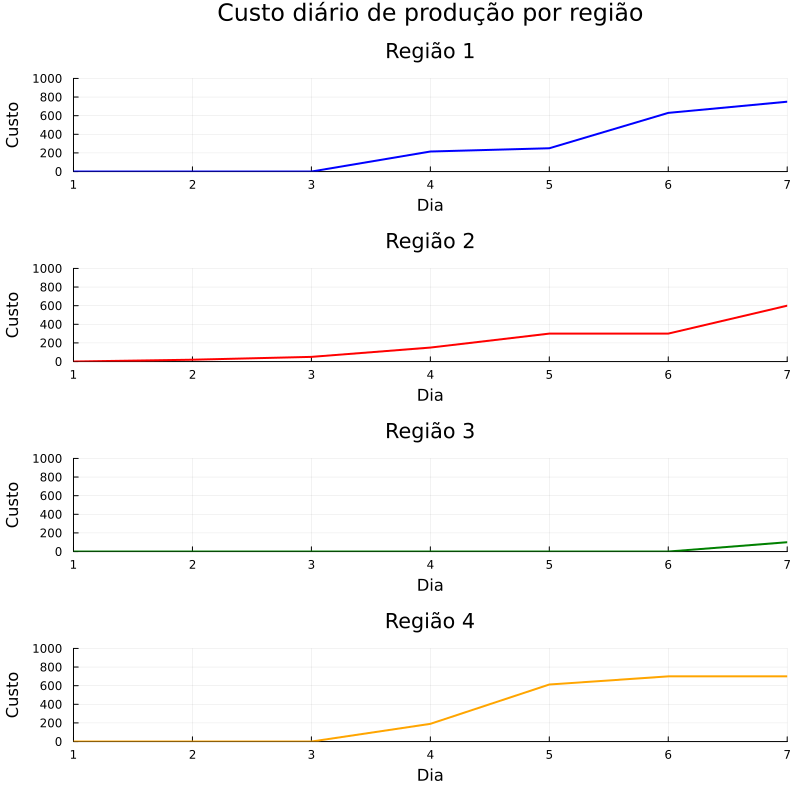

In [22]:
#Determinar custo diarios de produção por região (transferência entre regiões não gera despesas)
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = "Reg.$i"
    for t in 1:T
        custo_spot = value(s[i,t]) * spot[t]
        custo_termicas = 0
        for j in 1:qtdd_termicas[i]
            custo_termicas += value(u[i,j,t]) * c[i,j]
        end

        results[i,t+1] = custo_spot + custo_termicas
    end
end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(Int(i)))
end
println("Custo diário de produção por região")
custo_diario = DataFrame(results, titles)
#plotar gráfico de linhas 
println(custo_diario)
#escalonar valores de results para plotar
results_escalonada = results[1:qtdd_hidreletricas,2:T+1] 

n_rows = qtdd_hidreletricas
n_cols = 1
layout = (n_rows, n_cols)

# Definindo cores para as linhas do gráfico
cores = [:blue, :red, :green, :orange, :purple, :yellow, :cyan, :magenta, :brown, :black]
plots = []

# Criando um gráfico pequeno para cada região
for i in 1:qtdd_hidreletricas
    plotar = plot(1:T, results_escalonada[i,1:end], legend=false, color=cores[i], linewidth=2,
             xlabel="Dia", ylabel="Custo",
             title="Região $i",
             xlims=(1, T), ylims=(0, 1000),
             xticks=1:T, yticks=0:200:1000,
             size=(800, 800))
    push!(plots, plotar)
end
 
# Criando o gráfico combinado
plotar_custo = plot(plots..., layout=layout, plot_title="Custo diário de produção por região")


# Problema 2.2 - Gestão de carreiras

In [23]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:5] >= 0)  

# Função objetivo
c = [0.05; 0.065; 0.057; 0.052; 0.1] 
@objective(model, Max, sum(q[i] * c[i] for i in 1:5)) 
# Restrições de limitação de investimento
@constraint(model, sum(q[i] for i in 1:5) == 100000)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Retorno: ", objective_value(model) + 100000)  
println("Lucro obtido: ", objective_value(model)) 
println("Investimento em cada ativo:")
for i in 1:5
    println("q[$i] = ", value(q[i]))
end



Retorno: 110000.0
Lucro obtido: 10000.0
Investimento em cada ativo:
q[1] = 0.0
q[2] = 0.0
q[3] = 0.0
q[4] = 0.0
q[5] = 100000.0


# Problema 2.3 - Planificação da expansão de produção

In [24]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# custo de unidades não vendidas
p = [400 400 400]
# custo de horas extras
c = [2.5 3.75 5 3]
#tempo de revisão de cada máquina por hora trabalhada
t = [0.08 0.04 0.03 0.01]
#horas disponíveis de cada maquina
h = [500 500 500 500]
#tempo máximo de trabalho de cada máquina
u = [2000 2000 3000 3000]
# u = [1000 1000 1000 1000]
# Taxa de produção de i em j
a = [0.6 0.6 0.9 0.8; 0.1 0.9 0.6 0.8; 0.05 0.2 0.5 0.8]
#Custo por hora de produção de i em j
q = [2.6 3.4 3.4 2.5; 1.5 2.4 2 3.6; 4 3.8 3.5 3.2]
#demanda numa semana
d = [1800 600 3000]

# Variáveis de decisão
# h[i] = horas convencionais de trabalho em cada máquina
#@variable(model, hc[1:4] >= 0)  
# e[j] = horas extras de trabalho em cada máquina
@variable(model, e[1:4] >= 0)
# tempo H[i,j] de confecção de i em j
@variable(model, H[1:3, 1:4] >= 0)

# Função objetivo
@objective(model, Min, sum(q[i,j] * H[i,j] for i in 1:3, j in 1:4) + 
                sum(c[j] * e[j] for j in 1:4) +
                sum(p[i]*(d[i] - sum(a[i,j]*H[i,j] for j in 1:4)) for i in 1:3))
             
# Restrições de horas por máquina
@constraint(model,[j in 1:4], h[j] + e[j]  <= u[j])
# Restrições de horas de revisão
@constraint(model,sum(t[j]*(e[j] + h[j]) for j in 1:4)  <= 100 )
# Limitação de horas contratadas
#@constraint(model,[j in 1:4],hc[j] <= hd[j] )
# Restrições de demanda
@constraint(model,[i in 1:3], sum(a[i,j]*H[i,j] for j in 1:4) <= d[i] )
# Restrições de soma de horas por máquina
@constraint(model,[j in 1:4], sum(H[i,j] for i in 1:3) == h[j] + e[j] )
# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo total: ", round(objective_value(model)))

Custo total: 897281.0


In [25]:
# Criando uma matriz para armazenar os resultados
results = Matrix{Any}(undef, 7, 8)

#1x1 -  4x8
for j in 1:4
    results[j, 1] = "Máquina $j"
    results[j, 2] = round(value(e[j]))
    results[j, 3] = round(value(h[j]))
    results[j, 4] = round(value(h[j]+ e[j]))
    results[j, 5] = round(value((e[j] + h[j])*t[j]))
    for i in 1:3
        results[j, 5 + i] = round(value(H[i,j]*a[i,j]))
    end
end

results[5, 5] = "Q-Produzidos"
results[6, 5] = "Q-Não vendidos"
results[7, 5] = "Q-Demanda"
for i in 1:3
    results[5, 5+i] = round(sum(value(H[i,j]*a[i,j]) for j in 1:4))
    results[6, 5+i] = round(value(d[i] - sum(value(H[i,j]*a[i,j]) for j in 1:4)))
    results[7, 5+i] = d[i]
end
for i in 5:7
    for j in 1:4
        results[i,j] = ""
    end
end

# Criando um DataFrame
df = DataFrame(results, ["Máquina", "H-Extra", "H-Disponível", "H-Total", "H-Revisão", "Q-Produto 1", "Q-Produto 2", "Q-Produto 3"])
#definindo titulo das colunas do DataFrame

# Exibindo o DataFrame
println(df)
# show(df, hlines = 5:5)


7×8 DataFrame
 Row │ Máquina    H-Extra  H-Disponível  H-Total  H-Revisão       Q-Produto 1  Q-Produto 2  Q-Produto 3 
     │ Any        Any      Any           Any      Any             Any          Any          Any         
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Máquina 1  0.0      500           500.0    40.0            300.0        0.0          0.0
   2 │ Máquina 2  0.0      500           500.0    20.0            0.0          450.0        0.0
   3 │ Máquina 3  0.0      500           500.0    15.0            450.0        0.0          0.0
   4 │ Máquina 4  2000.0   500           2500.0   25.0            1050.0       0.0          950.0
   5 │                                            Q-Produzidos    1800.0       450.0        950.0
   6 │                                            Q-Não vendidos  0.0          150.0        2050.0
   7 │                                            Q-Demanda       1800         600      

# Problema 2.4 - Gestão de contratos com opção de cancelamento

In [26]:
model = Model(GLPK.Optimizer)
########################################################################3

# dados
# Janela de tempo
T = 7
# Número de contratos
N = 10
# Custo de armazenamento 
cₜ = [1, 1, 1, 1, 1, 1, 1]
# Custo de demanda insatisfeita 
pₜ = [1, 1, 1, 1, 1, 1, 1]
# Preço spot 
Sₜ = [1, 1, 1, 1, 1, 1, 1]
# Carga do contrato 
Qₙ = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# preço unitário do cancelamento do contrato n no tempo t
fₙₜ = [
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1]
]
# Quantidade de gás contratado
Qₜ = [1, 1, 1, 1, 1, 1, 1]
# Mínimo do reservatório no tempo t
sᵗ_ = [1, 1, 1, 1, 1, 1, 1]
# Máximo do reservatório no tempo t
sᵗ⁻ = [1, 1, 1, 1, 1, 1, 1]
# Mínimo no pipeline
sₚᵗ_ = [1, 1, 1, 1, 1, 1, 1]
# Máximo no pipeline 
sₚᵗ⁻ = [1, 1, 1, 1, 1, 1, 1]
# Demanda de gás no tempo t
Dₜ = [1, 1, 1, 1, 1, 1, 1]
###############################################################
#variáveis de decisão

#qtdd de gas injected from Q_t to clients at time t
@variable(model, uₚ⁰ᵗ[t = 1:T] >= 0, Int)
#qtdd de gas going from Q_t to storage ate time T
@variable(model, uₛ¹ᵗ[t = 1:T] >= 0,Int)
#qtdd de gas going from Q_t to pipeline ate time T
@variable(model, uₛ²ᵗ[t = 1:T] >= 0,Int)
#qtdd de gas from ship to storage at time t
@variable(model, uₙᵗ[n = 1:N, t = 1:T] >= 0,Int)
#qtdd de gas from ship n to pipeline at time t
@variable(model, uₙ⁰ᵗ[n = 1:N, t = 1:T] >= 0,Int)
#qtdd de gas from pipeline to clients at t
@variable(model, uₚᵗ[t = 1:T] >= 0,Int)
#qtdd of unsatisfeid demand
@variable(model, uₙₛᵗ[t = 1:T] >= 0,Int)
#storage at t(tank)
@variable(model, sᵗ[t = 1:T] >= 0,Int)
#storage at t(pipeline)
@variable(model, sₚᵗ[t = 1:T] >= 0,Int)
#qtdd de gas no navio n no tempo t
@variable(model, sₙᵗ[n = 1:N,t = 1:T] >= 0,Int)
#cancelamentos
@variable(model, yₙᵗ[n = 1:N,t = 1:T] >= 0,Bin)

###################################################################33
#função objetivo
@objective(model, Min, sum((cₜ[t] * (sᵗ[t] + pₜ[t] * uₙₛᵗ[t] - 1.3 * Sₜ[t] * uₚᵗ[t])) for t in 1:T) +
                    sum(Qₙ[n] * Sₜ[T] * (1 - yₙᵗ[n,T]) for n in 1:N)+
                    sum( sum(Qₙ[n] * fₙₜ[n][t] * (yₙᵗ[n,t] - yₙᵗ[n,t-1]) for t in 2:T ) for n in 1:N))
                

###############################################################################
#restrições

@constraint(model, [t in 1:T], Qₜ[t] == uₚ⁰ᵗ[t]+uₛ¹ᵗ[t])
@constraint(model, [t in 1:T],sᵗ_[t] <= sᵗ[t] )
@constraint(model, [t in 1:T],sᵗ[t] <= sᵗ⁻[t] )
@constraint(model, [t in 1:T],sₚᵗ_[t] <= sₚᵗ[t] )
@constraint(model, [t in 1:T],sₚᵗ[t] <= sₚᵗ⁻[t] )
@constraint(model, [t in 2:T, n in 1:N],yₙᵗ[n,t] >= yₙᵗ[n,t-1] ) 
@constraint(model, [n in 1:N],yₙᵗ[n,1] == 0 ) 
@constraint(model, [n in 1:N], sₙᵗ[n,T] ==Qₙ[n]*(1-yₙᵗ[n,T-1]) )
@constraint(model, [n in 1:N, t in 2:(T-1)], sₙᵗ[n,t] == sₙᵗ[n,t-1] - uₙᵗ[n,t] - uₙ⁰ᵗ[n,t] )
@constraint(model, [t in 1:T], Qₜ[t] == uₚ⁰ᵗ[t]+uₛ¹ᵗ[t])
@constraint(model, [t in 2:T], sₚᵗ[t] == sₚᵗ[t-1]+sum( uₙ⁰ᵗ[n,t] for n in 1:N)+uₚ⁰ᵗ[t] + uₛ²ᵗ[t]-uₚᵗ[t] )
@constraint(model, [t in 2:T], sᵗ[t] == sᵗ[t-1] +sum( uₙᵗ[n,t] for n in 1:N)+uₛ¹ᵗ[t]-uₛ²ᵗ[t] )
@constraint(model, [t in 1:T], Dₜ[t] == uₚᵗ[t] + uₙₛᵗ[t])
####################################################################################3
#Resolvendo o modelo
optimize!(model)

#Imprimindo o resultado
println("Custo total: ", objective_value(model))




Custo total: 7.9


# Problema 2.5 - Problema da mochila

In [27]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:25], Bin)  

# Função objetivo
# Lista de objetos úteis para uma viagem às montanhas da Cordilheira dos Andes
objetos = [
    "Barraca resistente ao frio", "Saco para baixas temperaturas",
    "Papel Higiênico", "Panela leve para cozinhar", "Canivete suíço",
    "Cordas de escalada", "Capacete de escalada", "Mosquetões",
    "Roupas térmicas", "Luvas resistentes ao frio", "Gorro de lã",
    "Óculos de sol com proteção UV", "Botas de trekking impermeáveis",
    "Mapa da região", "GPS portátil", "Cantil de água", "Comida em pó",
    "Protetor solar de alta proteção", "Kit de primeiros socorros",
    "Lanterna de cabeça", "Bússola", "Kit escalada",
    "Bolsa estanque para objetos importantes", "Mochila de trekking",
    "Garrafa térmica"
]

# Lista de valores numéricos da utilidade de cada objeto
utilidade = [
    9, 10, 8, 7, 6, 9, 9, 8, 10, 9, 8, 7, 9, 7, 8, 7, 9, 7, 10, 8, 7, 8, 7, 8, 9, 8
]

# Lista de pesos dos objetos (em kg)
pesos = [
    3, 2, 1, 0.5, 0.2, 4, 0.5, 0.3, 2, 0.3, 0.1, 0.1, 1.5, 0.1, 0.3, 0.2, 0.5, 0.1, 0.5,
    0.3, 0.2, 0.3, 0.2, 2, 0.5
]

@objective(model, Max, sum(utilidade[i] * x[i] for i in 1:25)) 

# Restrições de limite de carga
@constraint(model, sum( x[i] * pesos[i] for i in 1:25) <= 10)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Utilidade máxima: ", objective_value(model))  
println("Peso atingido: ", sum(pesos[i]*value(x[i]) for i in 1:25)) 
println("Objetos escolhidos:")
contador = 1
for i in 1:25
    if value(x[i]) > 0
        println(contador,".", objetos[i])
        contador+=1
    end
end


Utilidade máxima: 168.0
Peso atingido: 9.7
Objetos escolhidos:
1.Papel Higiênico
2.Panela leve para cozinhar
3.Canivete suíço
4.Capacete de escalada
5.Mosquetões
6.Roupas térmicas
7.Luvas resistentes ao frio
8.Gorro de lã
9.Óculos de sol com proteção UV
10.Botas de trekking impermeáveis
11.Mapa da região
12.GPS portátil
13.Cantil de água
14.Comida em pó
15.Protetor solar de alta proteção
16.Kit de primeiros socorros
17.Lanterna de cabeça
18.Bússola
19.Kit escalada
20.Bolsa estanque para objetos importantes
21.Garrafa térmica


# Problema 2.6 - Unit Commitment

In [28]:
#Definindo o modelo
model = Model(GLPK.Optimizer)

#Custo fixo por ligar uma usina
cfixo = [100, 200, 150, 250, 300, 200, 150, 250, 300, 200]

#Produção máxima de cada usina em cada mês
U = [2975 2202 2470 1055 1287 1563 2692 1829 1673 1357 1885 2664;
     1156 1833 1253 2656 2904 2217 1385 1066 2739 1841 2499 2153;
     2265 2964 1524 2118 1361 2389 1298 1079 1887 2501 1062 1640;
     1432 2759 2195 1359 1574 1846 2251 1958 1269 2943 2359 1108;
     2287 1394 2983 2122 2871 1559 1804 1218 2429 1095 1606 2570;
     1871 2627 2791 1945 1204 2327 2972 1575 1080 2459 2112 1610;
     1718 2960 2812 2115 1439 1088 2564 2262 1905 1380 2678 1250;
     2136 1918 1054 2289 1742 1472 2955 1256 1653 2774 2046 2839;
     1623 2071 2842 1170 2455 1701 1289 2640 1952 1735 2229 1397;
     2872 1740 2252 1645 1987 1324 2113 1407 1796 2281 2908 1571]


#Custo linear de Produção
cprod = [10, 20, 15, 25, 30, 20, 15, 25, 30, 20]

#Demandas
D = [1000, 2000, 1500, 2500, 3000, 2000, 1500, 2500, 3000, 2000, 9000, 10000]

#Variáveis de decisão
#Usina i ligada no mes ts
@variable(model, y[1:12, 1:10], Bin)
#Quantidade de energia que cada usina vai produzir mensalmente
@variable(model, u[1:12, 1:10]>=0, Int)

#Função objetivo
@objective(model, Min, sum(cfixo[i]*y[12, i] for i in 1:10) + sum(cprod[i]*u[t,i] for i in 1:10, t in 1:12))

#Restrições
#Produção máxima de cada usina
@constraint(model, [i in 1:10, t in 1:12], u[t,i] <= y[t,i]*U[i,t])
#Demanda
@constraint(model, [t in 1:12], sum(u[t,i] for i in 1:10) == D[t])
#Manter usina ligada 
@constraint(model, [i in 1:10, t in 2:12], y[t,i] >= y[t-1,i])

#Resolvendo o modelo
optimize!(model)

#Imprimindo o resultado
println("Custo total: ", objective_value(model))
println("Usinas ligadas:")
for i in 1:10
    for t in 1:12
            if t ==1 && value(y[t,i]) == 1
                println("Usina $i ligada no mês $t")
            elseif value(y[t,i]) == 1 && value(y[t-1,i]) == 0
                println("Usina $i ligada no mês $t")
            end 
        end
    end

Custo total: 543540.0
Usinas ligadas:
Usina 1 ligada no mês 1
Usina 2 ligada no mês 6
Usina 3 ligada no mês 4
Usina 6 ligada no mês 12
Usina 7 ligada no mês 5
Usina 10 ligada no mês 11


10×13 DataFrame
 Row │ Usina  Mês 1  Mês 2  Mês 3  Mês 4  Mês 5  Mês 6  Mês 7  Mês 8  Mês 9  Mês 10  Mês 11  Mês 12 
     │ Any    Any    Any    Any    Any    Any    Any    Any    Any    Any    Any     Any     Any    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1      1000   2000   1500   1055   1287   1563   1500   1829   1673   1357    1885    2664
   2 │ 2      0      0      0      0      0      0      0      0      0      0       467     1265
   3 │ 3      0      0      0      1445   274    437    0      671    0      643     1062    1640
   4 │ 4      0      0      0      0      0      0      0      0      0      0       0       0
   5 │ 5      0      0      0      0      0      0      0      0      0      0       0       0
   6 │ 6      0      0      0      0      0      0      0      0      0      0       0       1610
   7 │ 7      0      0      0      0      1439   0      0      0      1327   0       2678    1250
 

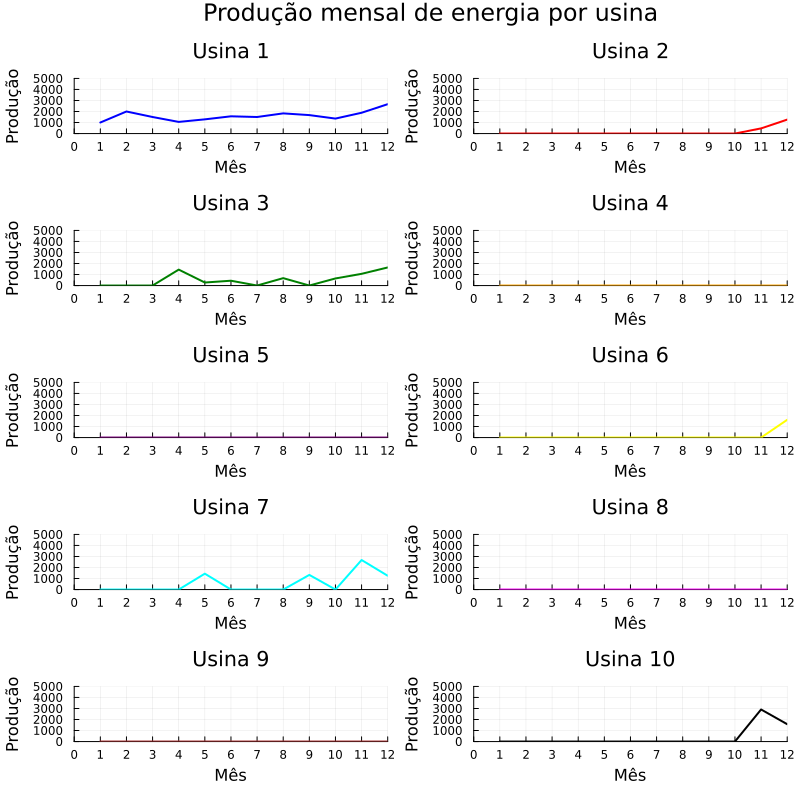

In [29]:
using DataFrames

# Criando a matriz de dados
dados = Matrix{Any}(undef, 10, 13)

# Adicionando títulos à primeira coluna
for i in 1:10
    dados[i, 1] = "$i"
end

# Preenchendo os dados das usinas
for i in 1:10
    for t in 2:13
        dados[i, t] = Int(value(u[t-1,i]))
    end
end

# Criando um DataFrame
titles = ["Usina", "Mês 1", "Mês 2", "Mês 3", "Mês 4", "Mês 5", "Mês 6", "Mês 7", "Mês 8", "Mês 9", "Mês 10", "Mês 11", "Mês 12"]
df = DataFrame(dados, titles)

# Exibindo o DataFrame
# show(df)
println(df)


# Configuração do layout dos subplots
n_rows = 5
n_cols = 2
layout = (n_rows, n_cols)

# Definindo cores para as linhas do gráfico
cores = [:blue, :red, :green, :orange, :purple, :yellow, :cyan, :magenta, :brown, :black]
plots = []
# titulo = plot(title="Supertitle",framestyle=nothing,showaxis=false,xticks=false,yticks=false,margin=0)
# push!(plots, titulo)
# Criando um gráfico pequeno para cada usina
for i in 1:10
    p = plot(1:12, dados[i,2:end], legend = false, color=cores[i], linewidth=2,
             xlabel="Mês", ylabel="Produção",
             title="Usina $i",
             xlims=(0, 12), ylims=(0, 5000),
             xticks=0:12, yticks=0:1000:5000,
             size=(800, 800))
    push!(plots, p)
end
 
# Exibindo os subplots em um layout
p_combined = plot(plots..., layout=layout, plot_title = "Produção mensal de energia por usina")

p_combined  # Exibindo o plot conjunto

# Problema 3.1


In [30]:
#Definindo o modelo 
model = Model(GLPK.Optimizer)

c = [5.5, 4.5, 7.5, 11.25] #custo de produção de cada produto

#matéria prima disponível
M = [8000 4250 16000 2000]
#Variáveis de decisão
#quantidade de l´ıquido i usado na produ¸c˜ao da mistura j
@variable(model,xᵢⱼ[1:4,1:3] >= 0, Int)
# quantidade de l´ıquido i que vai ser vendido diretamente
@variable(model,lᵢ[1:4] >= 0, Int)
#p denota a quantidade do produto P que serA˜A¡ produzida
@variable(model,p >= 0, Int)

#Função objetivo
@objective(model, Max,  6*sum(lᵢ[i] for i in 1:4)
                        +22*p+11*(sum(xᵢⱼ[i,1] for i in 1:4)-p/3)
                        +15*(sum(xᵢⱼ[i,2] for i in 1:4))+14*(sum(xᵢⱼ[i,3] for i in 1:4)-2p/3) 
                        -5.5*(sum(xᵢⱼ[1,j] for j in 1:3)+lᵢ[1])
                        -4.5*(sum(xᵢⱼ[2,j] for j in 1:3)+lᵢ[2])
                        -7.5*(sum(xᵢⱼ[3,j] for j in 1:3)+lᵢ[3])
                        -11.25*(sum(xᵢⱼ[4,j] for j in 1:3)+lᵢ[4])
    
)

#Restrições

#estoques disponíveis dos liquidos:
@constraint(model, lᵢ[1]+sum(xᵢⱼ[1,j] for j in 1:3) <= 8000)
@constraint(model, lᵢ[2]+sum(xᵢⱼ[2,j] for j in 1:3) <= 4250)
@constraint(model, lᵢ[3]+sum(xᵢⱼ[3,j] for j in 1:3) <= 16000)
@constraint(model, lᵢ[4]+sum(xᵢⱼ[4,j] for j in 1:3) <= 2000)

#restrições de composição
#mistura 1
@constraint(model, xᵢⱼ[1,1] == 0.3*sum(xᵢⱼ[i,1] for i in 1:4))
@constraint(model, xᵢⱼ[2,1] >= 0.1*sum(xᵢⱼ[i,1] for i in 1:4))
@constraint(model, xᵢⱼ[3,1] >= 0.4*sum(xᵢⱼ[i,1] for i in 1:4))
@constraint(model, xᵢⱼ[4,1] >= 0.05*sum(xᵢⱼ[i,1] for i in 1:4))
#mistura 2
@constraint(model, xᵢⱼ[1,2] >= 0.25*sum(xᵢⱼ[i,2] for i in 1:4))
@constraint(model, xᵢⱼ[2,2] <= 0.2*sum(xᵢⱼ[i,2] for i in 1:4))
@constraint(model, xᵢⱼ[3,2] == 0.2*sum(xᵢⱼ[i,2] for i in 1:4))
@constraint(model, xᵢⱼ[4,2] >= 0.1*sum(xᵢⱼ[i,2] for i in 1:4))
#mistura 3
@constraint(model, xᵢⱼ[1,3] == 0.2*sum(xᵢⱼ[i,3] for i in 1:4))
@constraint(model, xᵢⱼ[2,3] >= 0.15*sum(xᵢⱼ[i,3] for i in 1:4))
@constraint(model, xᵢⱼ[3,3] == 0.4*sum(xᵢⱼ[i,3] for i in 1:4))
@constraint(model, xᵢⱼ[4,3] <= 0.2*sum(xᵢⱼ[i,3] for i in 1:4))

#restrição de produção das misturas
@constraint(model, sum(xᵢⱼ[i,1] for i in 1:4) >= 400)
@constraint(model, sum(xᵢⱼ[i,2] for i in 1:4) >= 800)
@constraint(model, sum(xᵢⱼ[i,3] for i in 1:4) >= 200)

#resrições sobre o produto p
@constraint(model, sum(xᵢⱼ[i,1] for i in 1:4) - p/3>=0)
@constraint(model, sum(xᵢⱼ[i,3] for i in 1:4) - 2p/3>=0)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))

# Exibir quantidade de cada composto comprado
println("Quantidade de cada composto vendido diretamente:")
for i in 1:4
    println("Quantidade de L$i: ", value(lᵢ[i]))
end

# Exibir quantidade de cada composto produzido
println("Quantidade de cada composto produzido:")
for j in 1:3
    println("Quantidade de mistura $j: ", sum(value(xᵢⱼ[i, j]) for i in 1:4))
end

# Exibir quantidade de P produzido
println("Quantidade de P produzido: ", value(p))


Lucro máximo: 323230.5
Quantidade de cada composto vendido diretamente:
Quantidade de L1: 0.0
Quantidade de L2: 0.0
Quantidade de L3: 0.0
Quantidade de L4: 0.0
Quantidade de cada composto produzido:
Quantidade de mistura 1: 6010.0
Quantidade de mistura 2: 5420.0
Quantidade de mistura 3: 12015.0
Quantidade de P produzido: 18022.0


# Problema 3.2

In [31]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:3, 1:3] >= 0, Int)

# Função objetivo
@objective(model, Min, 50*x[1,1] + 90*x[1,2] + 80*x[1,3] + 60*x[2,2] + 50*x[2,3] + 30*x[3,2]+40x[3,3])


# Restrições de suprimento de energia
@constraint(model, sum(x[1,j] for j in 1:3) <= 50)
@constraint(model, sum(x[2,j] for j in 1:3) <= 50)
@constraint(model, sum(x[3,j] for j in 1:3) <= 20)
#restrções do suprimento da luz somente pela fonte de Eletricidade
@constraint(model, x[2,1] == 0)
@constraint(model, x[3,1] == 0)
#necessidades mensais de cada categoria
@constraint(model, sum(x[i,1] for i in 1:3) == 20)
@constraint(model, sum(x[i,2] for i in 1:3) == 10)
@constraint(model, sum(x[i,3] for i in 1:3) == 30)


# Resolver o modelo
optimize!(model)

# Imprimir o resultado
println("Custo mínimo: ", objective_value(model))

# Criar matriz de resultados
results = Matrix{Any}(undef, 4, 4)
results[1,1] = "Demanda"
results[2,1] = "Eletricidade"
results[3,1] = "Gás natural"
results[4,1] = "Painéis Solares"
results[1,2] = "Categoria 1"
results[1,3] = "Categoria 2"
results[1,4] = "Categoria 3"
results[2,2] = value(x[1,1])
results[2,3] = value(x[1,2])
results[2,4] = value(x[1,3])
results[3,2] = value(x[2,1])
results[3,3] = value(x[2,2])
results[3,4] = value(x[2,3])
results[4,2] = value(x[3,1])
results[4,3] = value(x[3,2])
results[4,4] = value(x[3,3])

# Imprimir matriz de resultados de forma organizada
println("\nResultados:")
header = ["Demanda       ", "Categoria 1 ", "Categoria 2 ", "Categoria 3 "]
println(join(header, " | "))
println("-"^47)  # Linha separadora

for i in 2:4
    row = [results[i,1]]
    for j in 2:4
        push!(row, lpad(string(results[i,j]), 11))  # Usar lpad para alinhar à direita
    end
    println(join(row, " | "))
end

Custo mínimo: 2700.0

Resultados:
Demanda        | Categoria 1  | Categoria 2  | Categoria 3 
-----------------------------------------------
Eletricidade |        20.0 |         0.0 |         0.0
Gás natural |         0.0 |         0.0 |        20.0
Painéis Solares |         0.0 |        10.0 |        10.0
